In [1]:
from sklearn.datasets import load_iris
import pandas as pd
data = load_iris()
data.target[[10, 25, 50]]

array([0, 0, 1])

In [2]:
X = pd.DataFrame(data.data, columns=data.feature_names)

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df = X.copy()

In [5]:
df['especie']=data.target

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


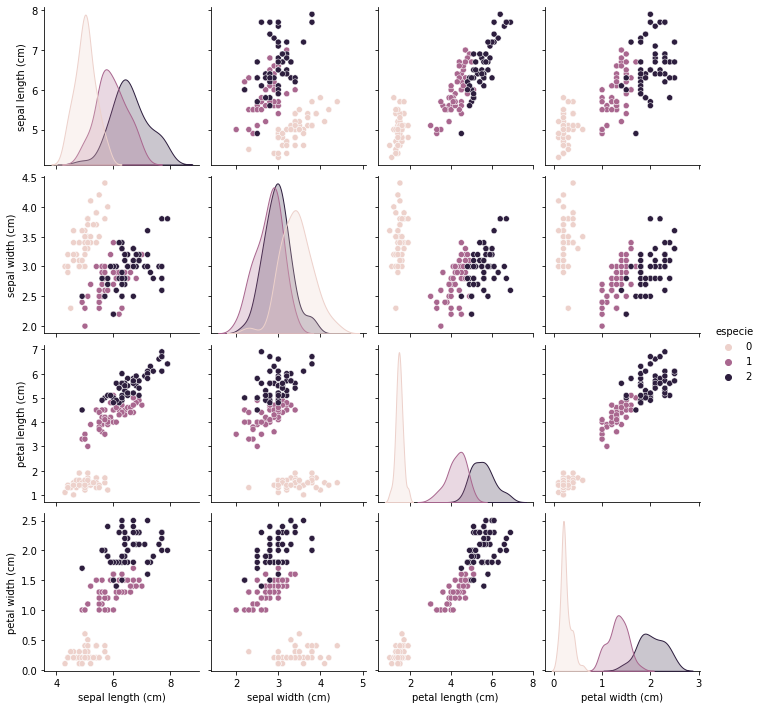

In [7]:
import seaborn as sns
sns.pairplot(df, hue='especie')

In [8]:
df = df.drop('especie', axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


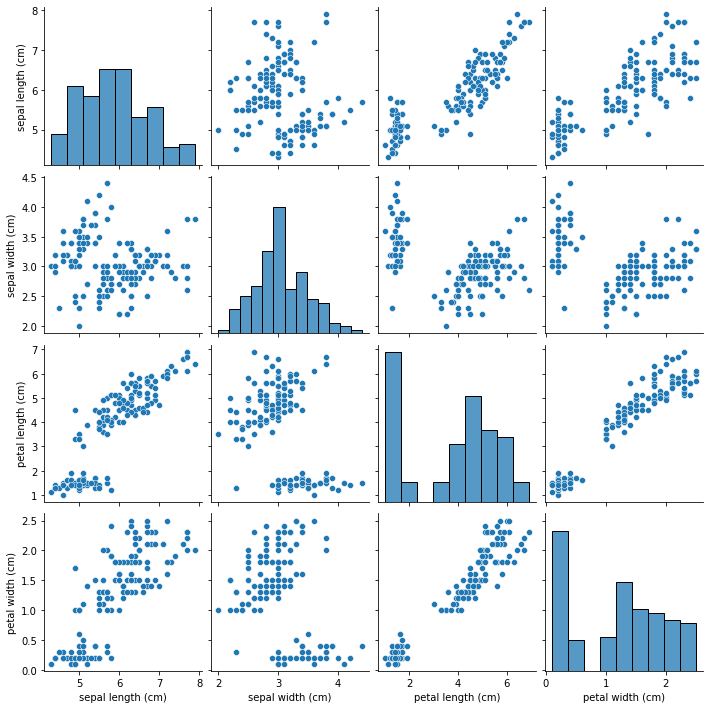

In [9]:
import seaborn as sns
sns.pairplot(df)

2. Case de Aprendizagem Não Supervisionada

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

In [13]:
df = pd.read_csv(url_data)

In [14]:
df=df.drop(['Channel', 'Region'], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [15]:
df.shape

(440, 6)

In [16]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


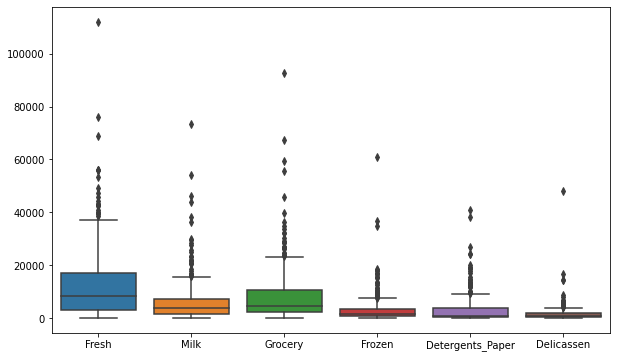

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)

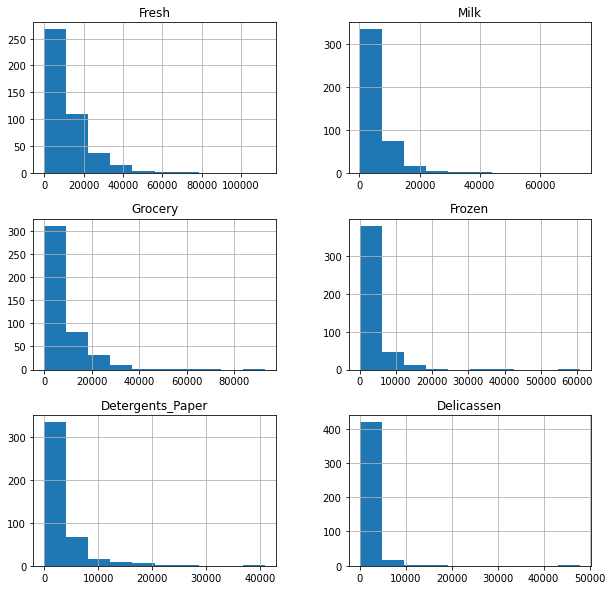

In [19]:
df.hist(figsize=(10,10));

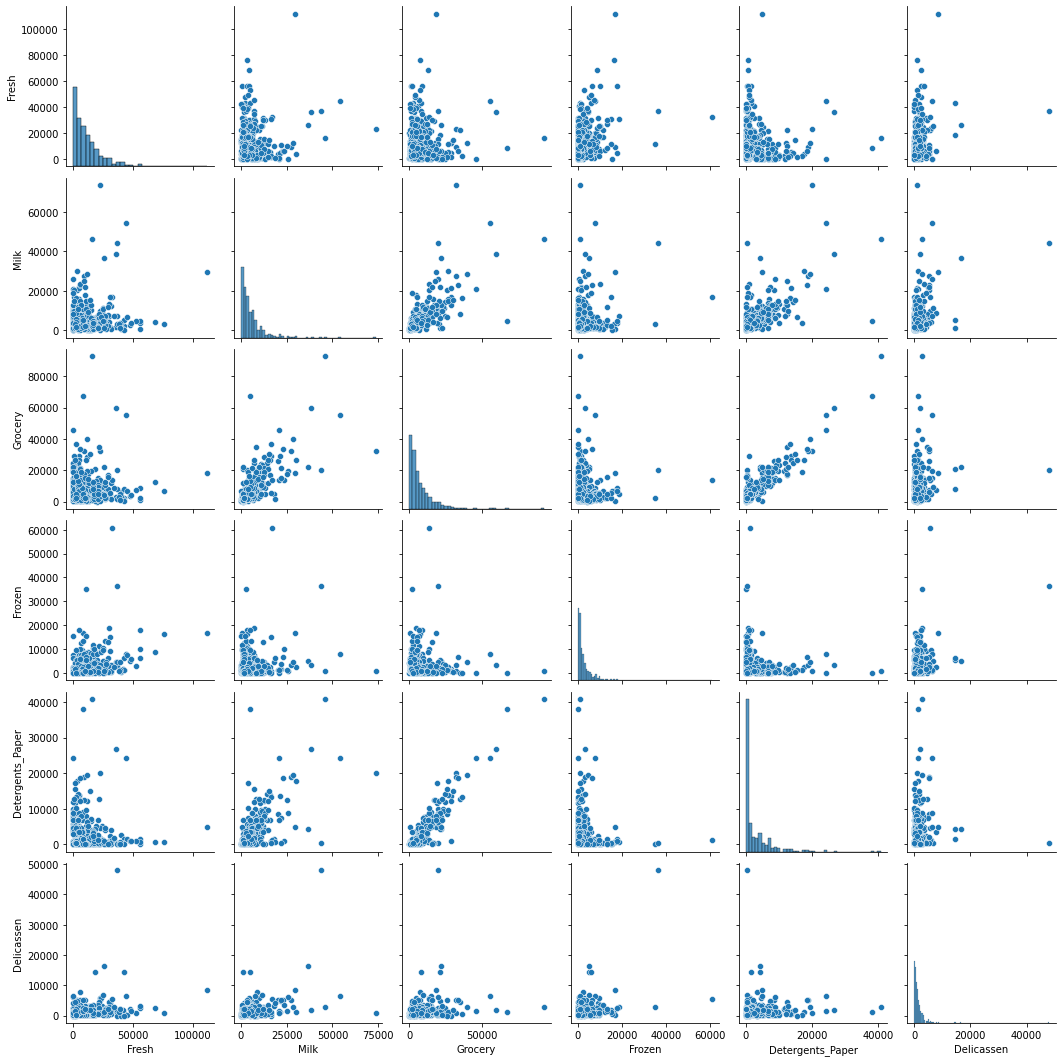

In [20]:
sns.pairplot(df)

In [21]:
np.log1p(10)

2.3978952727983707

In [22]:
np.expm1(7)

1095.6331584284585

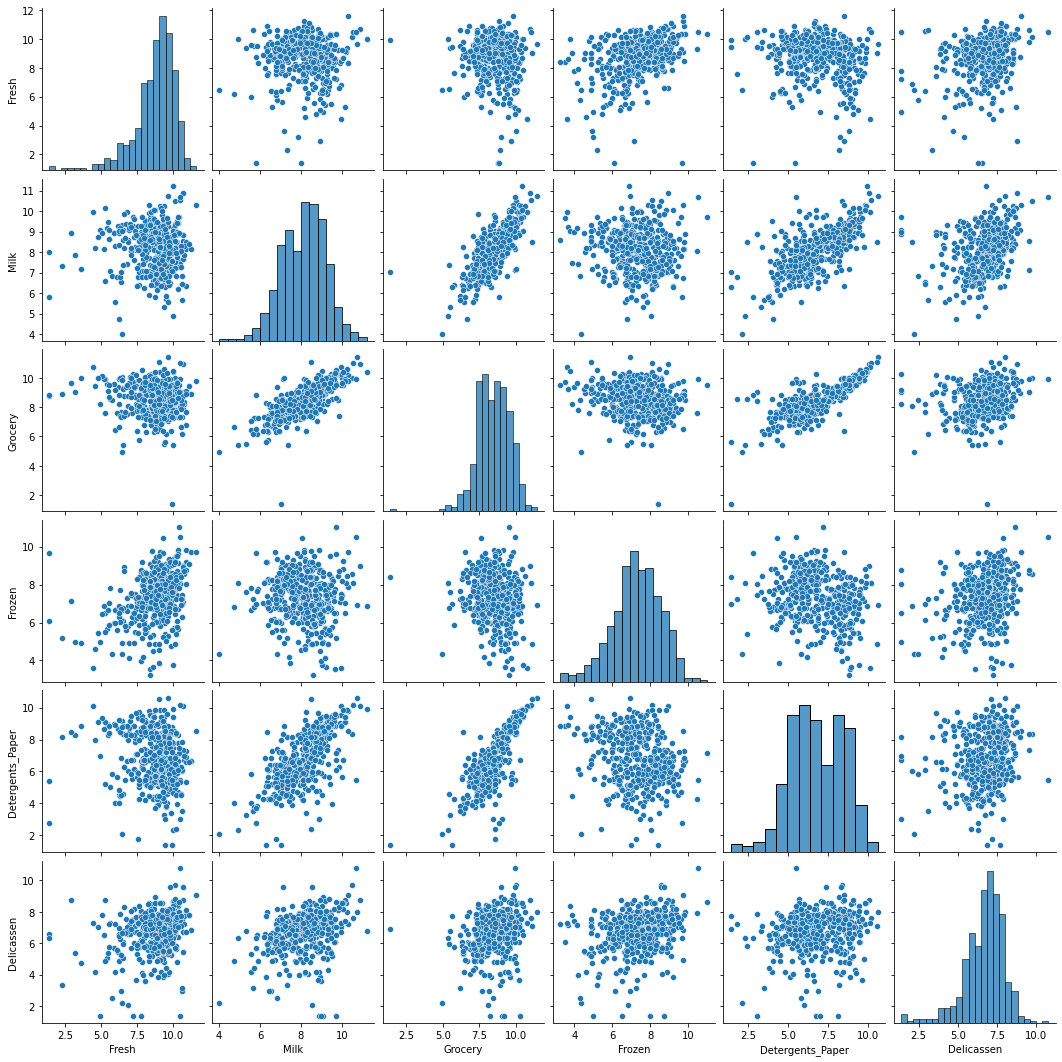

In [23]:
sns.pairplot(df.apply(np.log1p))

In [24]:
df_log=df.apply(np.log1p)

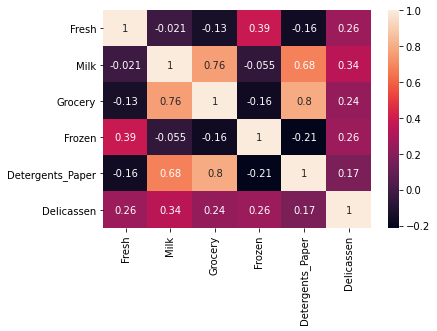

In [25]:
sns.heatmap(df_log.corr(), annot=True)

Possíveis Segmentos
Segmentos que consomem embutidos
Supermercados
Restaurantes (Fresh, Frozen)
Lojas de Conveniência
(Off) Outras Transformações
Para esse caso não há a necessidade de ajustar os dados para uma mesma escala. Mas para comparação, segue uma implementação do escalador StandardScaler. Percebemos que nada muda quanto à distribuição dos dados, apenas o intervalo agora fica mais próximo da origem. Originalmente esse escalador busca trazer os dados para a origem forçando com que a média seja zero e o desvio padrão igual à 1. Esse escalador será útil para casos que houverem outras colunas em que você gostaria de colocar dentro de uma mesma escala. Lembre-se: O log deve ser aplicado apenas à distribuições com caudas longas (comuns em dados financeiros) para ajudar em sua 'normalização'.

In [26]:
from sklearn.preprocessing import StandardScaler
df_scaled = df.copy()
scaler = StandardScaler()
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled[df_scaled.columns])

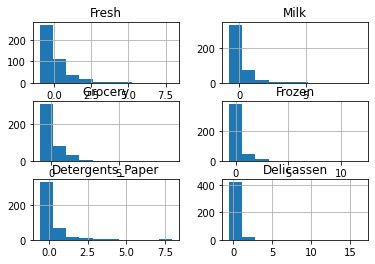

In [27]:
df_scaled.hist();

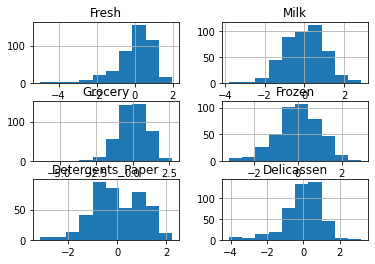

In [28]:
from sklearn.preprocessing import StandardScaler
df_scaled = df_log.copy()
scaler = StandardScaler()
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled[df_scaled.columns])
df_scaled.hist();

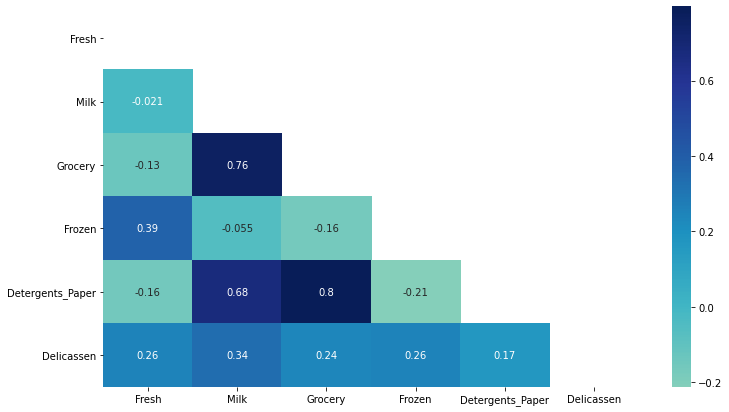

In [29]:
corr=df_log.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,7))
sns.heatmap(corr, mask = mask, annot=True, center=0, cmap="YlGnBu")

3. Modelo K-Means

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_log)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
labels=kmeans.labels_

In [32]:
kmeans.predict(df_log.head())

array([0, 0, 0, 1, 0], dtype=int32)

In [33]:
clusters = df_log.copy()
clusters['labels'] = labels
clusters.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678,0
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682,0
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632,0
3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412,1
4,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718,0


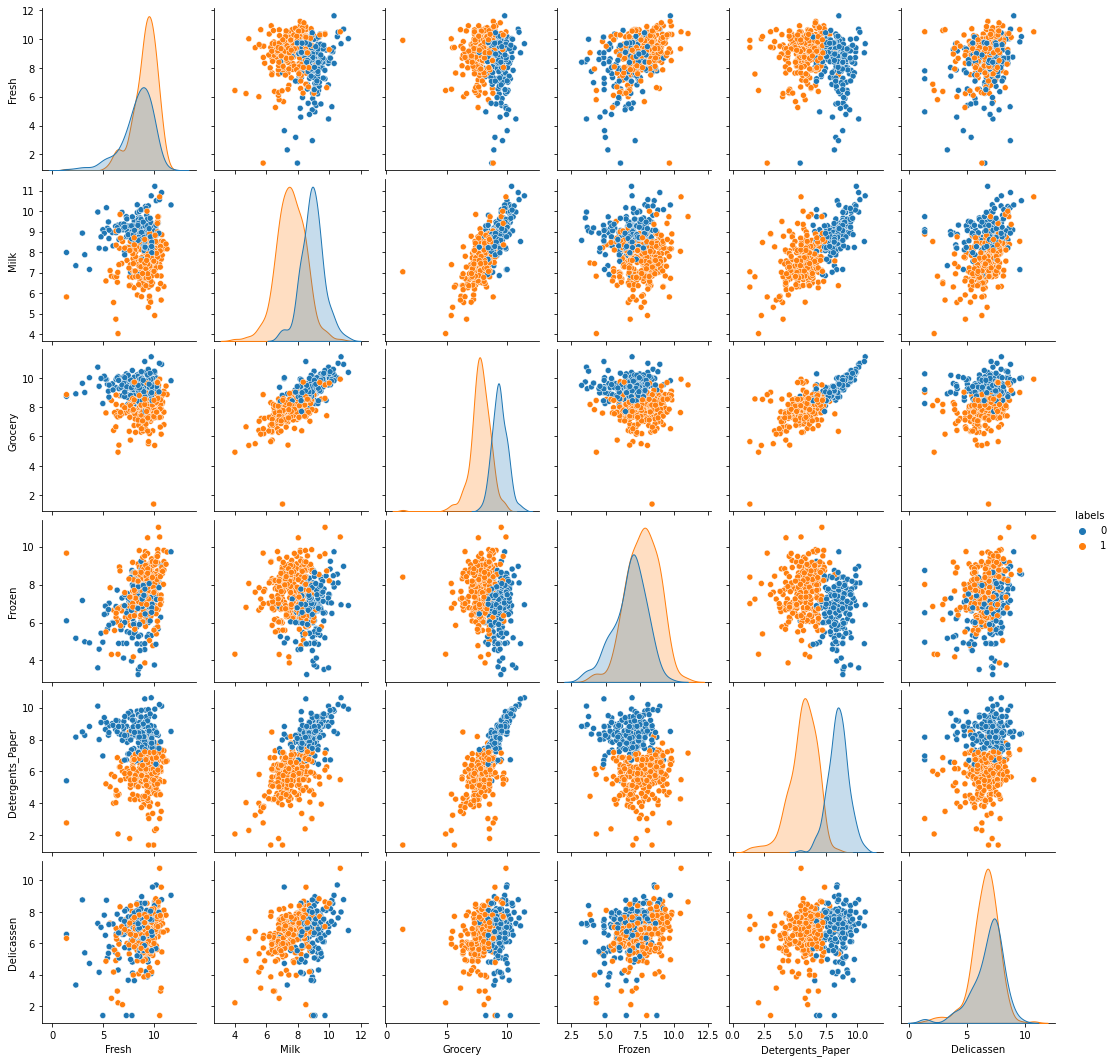

In [34]:
sns.pairplot(clusters, hue='labels')

4. Avaliação dos Clusters
Método da Silhoueta

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
for nc in range(2, 11):
  print('Numero de Clusters', nc)
  kmeans = KMeans(n_clusters=nc)
  kmeans.fit(df_log)
  labels = kmeans.labels_
  ss=silhouette_score(df_log, labels)
  print('Silhouette Score', ss)
  print('='*80)

Numero de Clusters 2
Silhouette Score 0.30067536605096706
Numero de Clusters 3
Silhouette Score 0.2613605285902604
Numero de Clusters 4
Silhouette Score 0.19171254627724685
Numero de Clusters 5
Silhouette Score 0.19853462147681017
Numero de Clusters 6
Silhouette Score 0.20060928683851512
Numero de Clusters 7
Silhouette Score 0.18579717295904627
Numero de Clusters 8
Silhouette Score 0.1926117913363163
Numero de Clusters 9
Silhouette Score 0.18865459101848628
Numero de Clusters 10
Silhouette Score 0.18966940215221384


In [37]:
# Modelo final
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_log)
labels = kmeans.labels_
ss=silhouette_score(df_log, labels)
print(ss)

0.30067536605096706


Redução de Dimensionalidade

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [39]:
data_reduced = pca.fit_transform(df_log)

In [40]:
pca.explained_variance_ratio_

array([0.44374606, 0.27667282])

In [41]:
sum(pca.explained_variance_ratio_)

0.7204188766620396

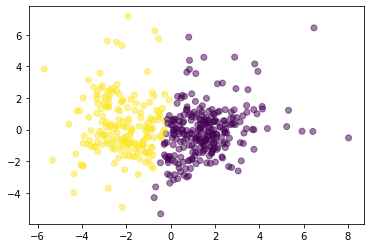

In [42]:
plt.scatter(data_reduced[:,0], data_reduced[:,1], c=labels, alpha=0.5)

In [43]:
df.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776


In [44]:
pca.components_

array([[ 0.17598374, -0.39646681, -0.45477321,  0.17410074, -0.74347594,
        -0.14818093],
       [-0.68428674, -0.16590365, -0.072854  , -0.4922102 , -0.04360531,
        -0.5047253 ]])

In [45]:
df=pd.read_csv(url_data)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


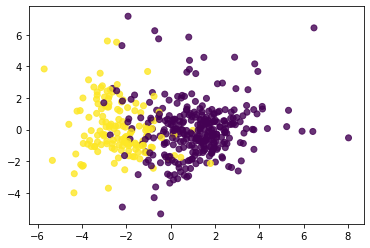

In [46]:
plt.scatter(data_reduced[:,0], data_reduced[:,1], c=df['Channel'], alpha=0.8)

(Bônus) Interpretação do PCA
Percebemos que os dados originais são os seguintes:

In [47]:
df_log.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632
3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412
4,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718


Com a aplicação de PCA eles são reduzidos para as seguintes duas dimensões:

In [48]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(df_log)
data_reduced[:5]

array([[-1.74690372, -0.06270009],
       [-1.7935518 , -0.86970685],
       [-1.88422616, -1.66935751],
       [ 1.13708733, -1.44976512],
       [-0.78459956, -2.4536    ]])

Podemos replicar isso a partir dos componentes do PCA da seguinte maneira

In [49]:
np.dot(df_log-df_log.mean(),pca.components_.T)[:5]

array([[-1.74690372, -0.06270009],
       [-1.7935518 , -0.86970685],
       [-1.88422616, -1.66935751],
       [ 1.13708733, -1.44976512],
       [-0.78459956, -2.4536    ]])